In [1]:
import pandas as pd
import ast
import matplotlib.pyplot as plt
from datasets import load_dataset
dataset=load_dataset('lukebarousse/data_jobs')
df= dataset["train"].to_pandas()
df['job_posted_date']=pd.to_datetime(df['job_posted_date'])
df['job_skills']=df['job_skills'].apply(lambda skill_list: ast.literal_eval(skill_list) if pd.notna(skill_list) else skill_list)


c:\Users\Chira\.conda\envs\python_course\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [9]:
df_us=df[(df['job_title_short']=="Data Analyst") & (df['job_country']=='United States')].copy()
df_us=df_us.dropna(subset=['salary_year_avg'])
df_us=df_us.explode('job_skills')
df_us_grp=df_us.groupby('job_skills')['salary_year_avg'].agg(['count','median'])
df_us_grp

,count,median
job_skills,,
airflow,44,116250.00
airtable,5,90000.00
alteryx,106,106281.25
angular,8,107500.00
ansible,1,159640.00
...,...,...
wire,4,74250.00
word,461,81194.75
workfront,3,75000.00


In [20]:
df_us_toppay= df_us_grp.sort_values(by='median', ascending=False).head(10)
df_us_skill= df_us_grp.sort_values(by='count', ascending=False).head(10).sort_values(by='median', ascending=False)
df_us_skill
##df_us_toppay

,count,median
job_skills,,
python,1431,97500.00
tableau,1364,92875.00
r,893,92500.00
sql server,286,92500.00
sql,2508,91000.00
sas,926,90000.00
power bi,838,90000.00
powerpoint,462,85000.00
excel,1808,84392.00


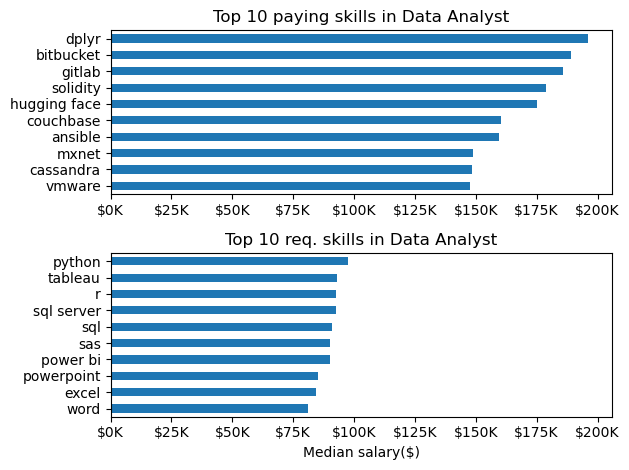

In [30]:
fig,ax=plt.subplots(2,1)

df_us_toppay[::-1].plot(kind='barh', y='median', ax=ax[0], legend=False) ## since barh thats why y='median'
ax[0].set_ylabel('')
ax[0].set_xlabel('')
ax[0].set_title('Top 10 paying skills in Data Analyst')
ax[0].xaxis.set_major_formatter(plt.FuncFormatter(lambda x, _:f'${int(x/1000)}K'))
df_us_skill[::-1].plot(kind='barh', y='median', ax=ax[1], legend=False)
ax[1].set_ylabel('')
ax[1].set_xlabel('Median salary($)')
ax[1].set_title('Top 10 req. skills in Data Analyst')
ax[1].set_xlim(ax[0].get_xlim())
ax[1].xaxis.set_major_formatter(plt.FuncFormatter(lambda x, _:f'${int(x/1000)}K'))
# plt.tight_layout()
# plt.show()  ### you can also use this as long as not mentioning any ax it will apply on whole fig
fig.tight_layout()